In [17]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask.distributed import Client
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import dask

In [18]:
temp_dir = 'C:/dask_temp'

if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

dask.config.set({'temporary_directory': temp_dir})

In [19]:
client = Client()

client

c:\Users\aksha\OneDrive\Desktop\Urban Fleet Equilibrium Engine via Dynamic Geo-Clustering\penv\Lib\site-packages\distributed\node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57868 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:57868/status,
Dashboard: http://127.0.0.1:57868/status,Workers: 4
Total threads: 8,Total memory: 7.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57871,Workers: 0
Dashboard: http://127.0.0.1:57868/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:57894,Total threads: 2
Dashboard: http://127.0.0.1:57900/status,Memory: 1.93 GiB
Nanny: tcp://127.0.0.1:57874,


2026-01-14 10:52:17,359 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle d4d0f34e1c4dc7de6ce15e20c63f8c74 initialized by task ('shuffle-transfer-d4d0f34e1c4dc7de6ce15e20c63f8c74', 77) executed on worker tcp://127.0.0.1:57896
2026-01-14 10:53:13,595 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle d4d0f34e1c4dc7de6ce15e20c63f8c74 deactivated due to stimulus 'task-finished-1768368193.5575979'
2026-01-14 11:14:09,670 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:57895 (pid=12492) exceeded 95% memory budget. Restarting...
2026-01-14 11:15:05,458 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:57896'.
2026-01-14 11:15:05,528 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:57895' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('repartitiontofewer-d4982df011e69349a37d093660105e28', 0)} (stimulus_id='handle-worker-cleanup-1768369505.51909')
2026

In [78]:
df_jan = dd.read_csv('../data/raw/yellow_tripdata_2016-01.csv', assume_missing=True)
df_feb = dd.read_csv('../data/raw/yellow_tripdata_2016-02.csv', assume_missing=True)
df_mar = dd.read_csv('../data/raw/yellow_tripdata_2016-03.csv', assume_missing=True)

In [5]:
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
print('shape of januaray dataset : ', df_jan.shape)
print('shape of february dataset : ', df_feb.shape)
print('shape of march dataset : ', df_mar.shape)

shape of januaray dataset :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(c57b34a)).size() // 19, dtype=int64>, 19)
shape of february dataset :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(c2ce05f)).size() // 19, dtype=int64>, 19)
shape of march dataset :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(51f25db)).size() // 19, dtype=int64>, 19)


| Column Name | Description |
| :--- | :--- |
| **VendorID** | A code indicating the TPEP provider that provided the record (e.g., 1 = Creative Mobile Technologies, 2 = VeriFone). |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **passenger_count** | The number of passengers in the vehicle (this is a driver-entered value). |
| **trip_distance** | The elapsed trip distance in miles reported by the taximeter. |
| **pickup_longitude** | The longitude coordinate where the meter was engaged. |
| **pickup_latitude** | The latitude coordinate where the meter was engaged. |
| **RatecodeID** | The final rate code in effect at the end of the trip (e.g., 1=Standard, 2=JFK, 3=Newark). |
| **store_and_fwd_flag** | Indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y/N). |
| **dropoff_longitude** | The longitude coordinate where the meter was disengaged. |
| **dropoff_latitude** | The latitude coordinate where the meter was disengaged. |
| **payment_type** | A numeric code signifying how the passenger paid for the trip (e.g., 1=Credit Card, 2=Cash). |
| **fare_amount** | The time-and-distance fare calculated by the meter. |
| **extra** | Miscellaneous extras and surcharges, such as the $0.50 and $1.00 rush hour and overnight charges. |
| **mta_tax** | $0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| **tip_amount** | Tip amount. This field is automatically populated for credit card tips (cash tips are not included). |
| **tolls_amount** | Total amount of all tolls paid in the trip. |
| **improvement_surcharge** | $0.30 improvement surcharge assessed on trips at the flag drop (began in 2015). |
| **total_amount** | The total amount charged to passengers. Does not include cash tips. |

In [ ]:
# removing columns that might not be useful for our objective (demand forcasting)

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type'])

In [8]:
df_final.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,19.0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,26.0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,9.0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,18.0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,11.5


In [ ]:
# no null values in my dataset 

df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [ ]:
# we need to convert the datetime columns into datetime datatype to get most of it

df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [ ]:
# we can clearly see some outliers in almost each and every columns 
# entire USA lies in left of maridian line, hence all the longitude should be negative, 
# but we have extreme positive values in longitude showing wrong entires
# same issue in latitude, where it can't have negative values, as USA lies entirely above the equator
# fare also have some outliers

df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


In [ ]:
# creating a dataframe to check the proportion of VendorID

vendor_share = pd.concat([(
    df_final['VendorID']
    .value_counts(normalize=True)
    .compute()
),
(
    df_final['VendorID']
    .value_counts()
    .compute()
)], axis=1
)

In [30]:
vendor_share

,proportion,count
VendorID,,
2.0,0.532576,18373797
1.0,0.467424,16126062


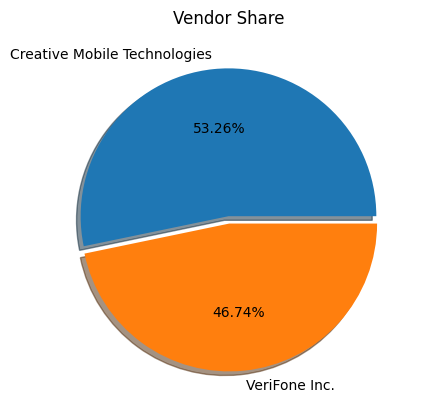

2026-01-13 15:29:14,690 - distributed.nanny - WARNING - Restarting worker
2026-01-13 15:29:15,196 - distributed.nanny - WARNING - Restarting worker
2026-01-13 15:29:15,736 - distributed.nanny - WARNING - Restarting worker
2026-01-13 15:29:15,888 - distributed.nanny - WARNING - Restarting worker


In [ ]:
plt.pie(vendor_share.proportion, labels=["Creative Mobile Technologies","VeriFone Inc."], shadow=True, explode= [0,0.05], autopct='%0.02f%%')
plt.title('Vendor Share')
plt.show()

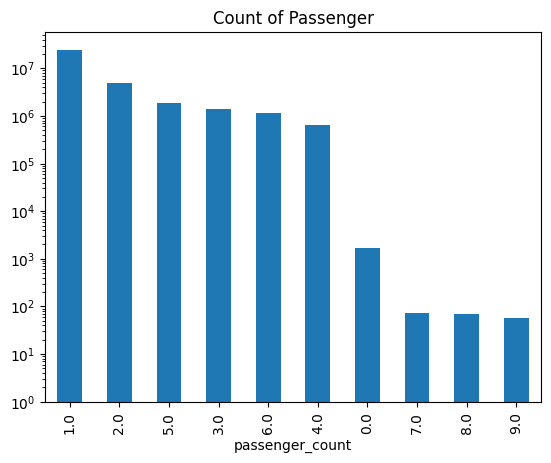

In [ ]:
# passenger count shows few wrong entries like 0 and >6
# as per the NYC taxi regulation, atmost limit of passengers is 5. but if there is young/baby as passenger
# they can allow 6 passengers

passenger_count = df_final['passenger_count'].value_counts().compute()

passenger_count.sort_values(ascending=False).plot(kind='bar', title='Count of Passenger', log=True)
plt.show()

<Axes: ylabel='trip_distance'>

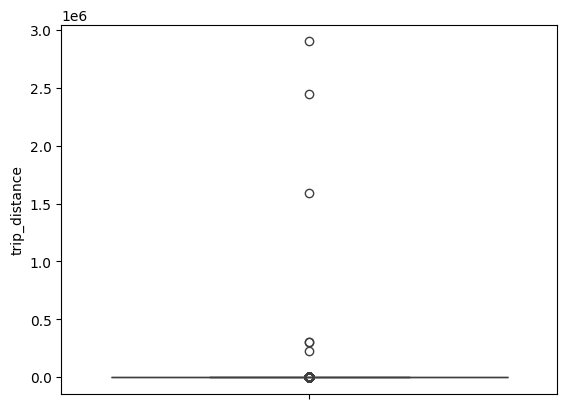

In [ ]:
# even in sample of 1% data, we can clearly see outliers, that are most probably wrong entries

sns.boxplot(df_final.sample(frac=0.1).loc[:, "trip_distance"].compute())

In [ ]:
# only less than 1% of data has wrong entries, that we can drop easily

percentile_values = np.arange(0.1,1.1,0.1)

for percentile in percentile_values:
    miles = df_final['trip_distance'].quantile(q=percentile).compute() 
    print(f'{round(percentile*100)}% of trip distance is less {miles} miles ({round(miles*1.6,1)} KM.)')

10% of trip distance is less 0.7 miles (1.1 KM.)
20% of trip distance is less 0.97 miles (1.6 KM.)
30% of trip distance is less 1.23 miles (2.0 KM.)
40% of trip distance is less 1.56 miles (2.5 KM.)
50% of trip distance is less 1.93 miles (3.1 KM.)
60% of trip distance is less 2.49 miles (4.0 KM.)
70% of trip distance is less 3.27 miles (5.2 KM.)
80% of trip distance is less 4.6 miles (7.4 KM.)
90% of trip distance is less 8.3 miles (13.3 KM.)
100% of trip distance is less 19072628.8 miles (30516206.1 KM.)


In [ ]:
percentile_values = np.arange(0.90,1.01,0.01)

for percentile in percentile_values:
    miles = df_final['trip_distance'].quantile(q=percentile).compute() 
    print(f'{round(percentile*100)}% of trip distance is less {miles} miles ({round(miles*1.6,1)} KM.)')

90% of trip distance is less 8.3 miles (13.3 KM.)
91% of trip distance is less 8.91 miles (14.3 KM.)
92% of trip distance is less 9.53 miles (15.2 KM.)
93% of trip distance is less 10.2 miles (16.3 KM.)
94% of trip distance is less 10.95 miles (17.5 KM.)
95% of trip distance is less 12.1 miles (19.4 KM.)
96% of trip distance is less 14.680000000000582 miles (23.5 KM.)
97% of trip distance is less 16.91 miles (27.1 KM.)
98% of trip distance is less 17.95 miles (28.7 KM.)
99% of trip distance is less 19.375500000000464 miles (31.0 KM.)
100% of trip distance is less 19072628.8 miles (30516206.1 KM.)


<Axes: ylabel='fare_amount'>

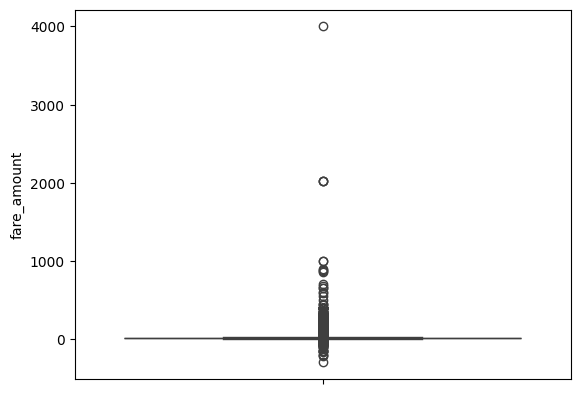

In [ ]:
# in fare cols too, we have outliers, that are most probably the wrong entries

sns.boxplot(df_final.loc[:, "fare_amount"].sample(frac=0.1).compute())

In [ ]:
# in fare_amount too, we have only less than 1% of data that has outlier value

percentile_values = np.arange(0.1,1.1,0.1)

for percentile in percentile_values:
    price = df_final['fare_amount'].quantile(q=percentile).compute()
    print(f'{round(percentile*100)}% of fare amount is less {round(price,2)}$')

10% of fare amount is less 5.0$
20% of fare amount is less 6.0$
30% of fare amount is less 7.5$
40% of fare amount is less 8.5$
50% of fare amount is less 10.0$
60% of fare amount is less 11.5$
70% of fare amount is less 14.0$
80% of fare amount is less 18.0$
90% of fare amount is less 27.0$
100% of fare amount is less 429496.72$


In [ ]:
percentile_values = np.arange(0.9, 1.01, 0.01)

for percentile in percentile_values:
    price = df_final['fare_amount'].quantile(q=percentile).compute()
    print(f'{round(percentile*100)}% of fare amount is less ${round(price,2)}')

90% of fare amount is less $27.0
91% of fare amount is less $29.0
92% of fare amount is less $30.5
93% of fare amount is less $33.0
94% of fare amount is less $35.5
95% of fare amount is less $40.0
96% of fare amount is less $49.5
97% of fare amount is less $52.0
98% of fare amount is less $52.0
99% of fare amount is less $52.0
100% of fare amount is less $429496.72


| ID | Name | What it actually means |
| :--- | :--- | :--- |
| **1** | **Standard Rate** | **The Normal Trip.** The meter calculates price based on time and distance. (97% of data will be this). |
| **2** | **JFK Airport** | **Flat Fee.** A trip to/from JFK Airport has a fixed price (usually $52.00 in 2015-16) regardless of traffic/time. |
| **3** | **Newark Airport** | **Surcharge.** A trip to Newark (New Jersey). The meter runs normally, but an extra fee ($15-$20) is added. |
| **4** | **Nassau/Westchester** | **Double Rate.** Trips going outside NYC to these specific counties. The meter clicks twice as fast (double the price per mile). |
| **5** | **Negotiated Fare** | **Fixed Price Agreement.** The driver and passenger agreed on a price before the trip started. (Rare and often indicates bad data or special limo-style booking). |
| **6** | **Group Ride** | **Split Fare.** Multiple passengers sharing a ride, each paying a flat fee (rare). |

<Axes: title={'center': 'Count by Rate Code ID'}, xlabel='RatecodeID'>

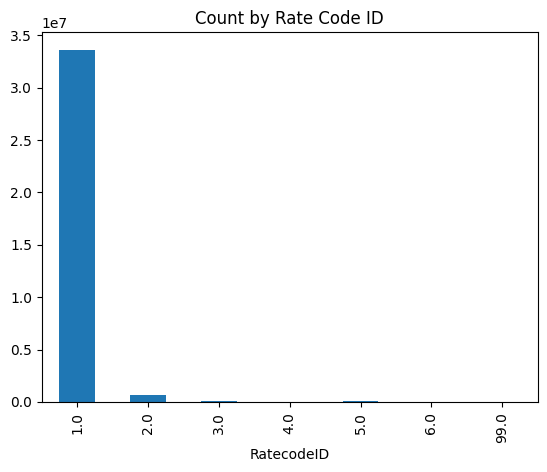

In [ ]:
# column have missing value which is shown as 99
# most of code id is 1, showing the trip is set to standard rate
# also it is not important column for demand prediction

rate_code_df = df_final['RatecodeID'].value_counts()

rate_code_df.sort_index().plot(kind='bar', title='Count by Rate Code ID')

In [27]:
location_df = df_final[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

[]

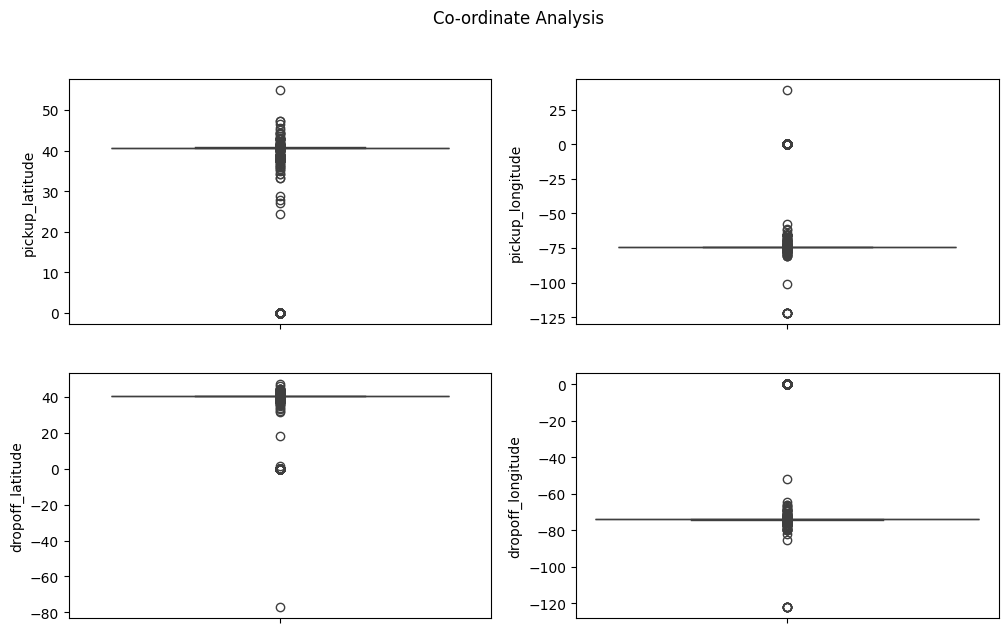

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,7))
ax = ax.ravel()

for i in range(4):
    sns.boxplot(y=location_df.sample(frac=0.1).iloc[:, i], ax=ax[i])

fig.suptitle('Co-ordinate Analysis')
plt.plot()

[]

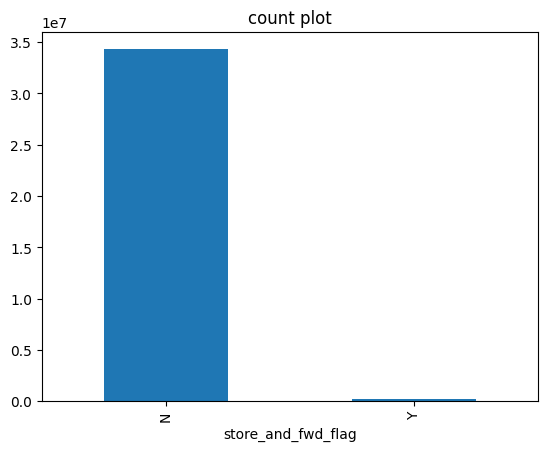

In [ ]:
# this column has most of value = 1, which shows that drivers only stores the data into car storage locally if it fails to send data to server in real time
# this col is not important for demand prediction

store_and_fwd_df = df_final['store_and_fwd_flag'].value_counts().compute()

store_and_fwd_df.plot(kind='bar', title='count plot')

plt.plot()

In [ ]:
# converting dtype of dataetime column

df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")

In [ ]:
# extracting month, day and hour from pickup time

df_final['pickup_month'] = df_final['tpep_pickup_datetime'].dt.month
df_final['pickup_day_of_week'] = df_final['tpep_pickup_datetime'].dt.dayofweek
df_final['pickup_hour'] = df_final['tpep_pickup_datetime'].dt.hour

In [35]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,pickup_month,pickup_day_of_week,pickup_hour
npartitions=82,,,,,,,,,,,,,,,
,float64,datetime64[ns],datetime64[ns],float64,float64,float64,float64,float64,string,float64,float64,float64,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
# taking a interval of 3 Days, and we can clearly see that there is zig-zag motion in pickup
# with a sudden drop in pickups around 18 jan, because of extreme weather conditions 

pickup_3D_interval = (
    df_final
    .set_index('tpep_pickup_datetime')
    .resample('3D')
    .size()
    .compute()
)

[]

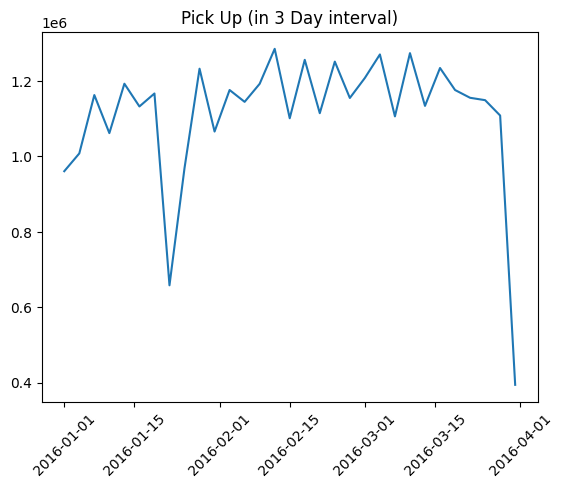

In [44]:
plt.plot(pickup_3D_interval)
plt.xticks(rotation=45)
plt.title('Pick Up (in 3 Day interval)')
plt.plot()

In [ ]:
# extracting count of pickups in each hour of each week
# we can clearly see that on weekends, we have more trips in mid nights
# and there is sudden drop in pickups during weekends in office hours

pickups_eachhour_of_eachweek = df_final.groupby(['pickup_day_of_week', 'pickup_hour'])['VendorID'].count().compute()

days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

daymapper = {i:j.title() for i,j in enumerate(days)}

pickups_eachhour_of_eachweek = (
    pickups_eachhour_of_eachweek
    .reset_index()
    .rename(columns={'VendorID' : 'Count of pickup'})
    .assign(
        pickup_day_of_week = lambda df:  df['pickup_day_of_week'].map(daymapper)
    )
)

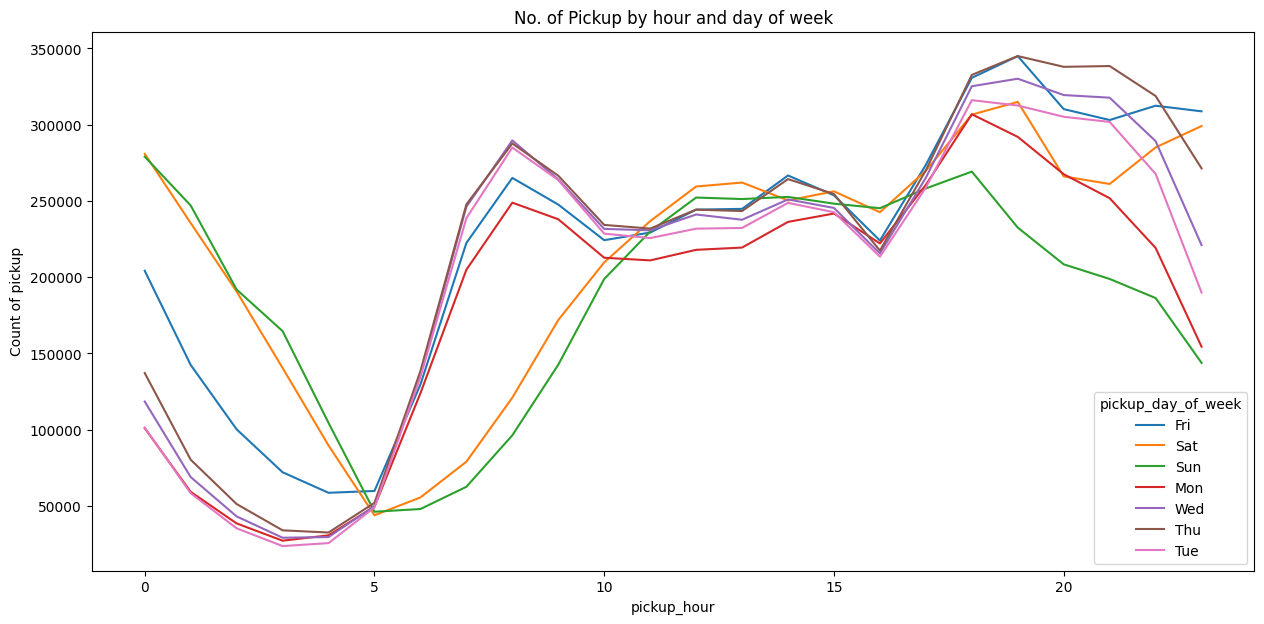

In [74]:
plt.figure(figsize=(15,7))

sns.lineplot(data=pickups_eachhour_of_eachweek, hue='pickup_day_of_week', y='Count of pickup', x='pickup_hour')
plt.title('No. of Pickup by hour and day of week')
plt.show()